In [7]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate

# 1-qubit QuantumCircuitを作成します
qc = QuantumCircuit(3)

# いくつかのゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGの各ノードを調べます
for node in dag.topological_op_nodes():
    print(f"The depth of H gate on qubit 0 is {node._node_id}")


The depth of H gate on qubit 0 is 6
The depth of H gate on qubit 0 is 8
The depth of H gate on qubit 0 is 7
The depth of H gate on qubit 0 is 9


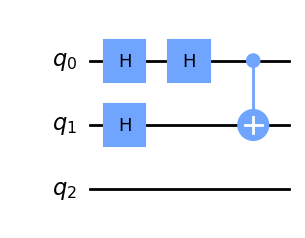

In [8]:
qc.draw('mpl')

In [9]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate, CXGate

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGの各ノードを調べます
gate_depths = {}
for node in dag.topological_op_nodes():
    if isinstance(node.op, (HGate, CXGate)):
        gate_depths[node.name + str(node._node_id)] = dag.depth_for_node(node)

# ゲートの深さを出力します
for gate, depth in gate_depths.items():
    print(f"The depth of {gate} is {depth}")


AttributeError: 'DAGCircuit' object has no attribute 'depth_for_node'

In [20]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.circuit.library import HGate, CXGate

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.cx(1,0)
qc.x(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# 各レイヤー（深さ）でのゲートの名前を取得します
layers = dag.serial_layers()
gate_depths = {}

for depth, layer in enumerate(layers):
    for node in layer['graph'].topological_op_nodes():
        if isinstance(node.op, (HGate, CXGate)):
            gate_depths[node.name + "_" + str(node._node_id)] = depth

# ゲートの深さを出力します
for gate, depth in gate_depths.items():
    print(f"The depth of {gate} is {depth}")


The depth of h_4 is 3
The depth of cx_4 is 5


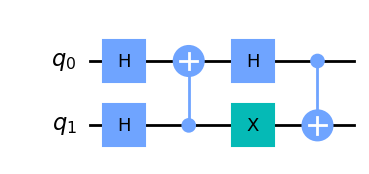

In [13]:
qc.draw('mpl')

In [21]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
from qiskit.dagcircuit import DAGCircuit

# 2-qubit QuantumCircuitを作成します
qc = QuantumCircuit(2)

# ゲートを追加します
qc.h(0)
qc.h(1)
qc.h(0)
qc.cx(0,1)

# DAGへ変換します
dag = circuit_to_dag(qc)

# DAGを描画します
dag_drawer(dag)

# 各レイヤー（深さ）でのゲートの名前を取得します
layers = dag.serial_layers()

for depth, layer in enumerate(layers):
    print(f"Layer {depth}:")
    for node in layer['graph'].topological_op_nodes():
        print(f"  {node.op.name}")


MissingOptionalLibraryError: "The 'PyDot' library is required to use 'dag_drawer'. You can install it with 'pip install pydot'."

In [15]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.converters import circuit_to_dag, dag_to_circuit

qc = QuantumCircuit(3)
qc.x(0)
qc.cx(1,0)
qc.ccx(0,2,1)
qc.cx(1,2)
qc.x(0)
qc.x(0)

qc.draw('mpl')

for gate in qc:
    print(gate)

(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe02af6a460>, [Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7fe02ae8bfd0>, [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe02ae438e0>, [Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 2), Qubit(QuantumRegister(3, 'q'), 1)], [])
(<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7fe02af478b0>, [Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe02abb1400>, [Qubit(QuantumRegister(3, 'q'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe02abb1430>, [Qubit(QuantumRegister(3, 'q'), 0)], [])


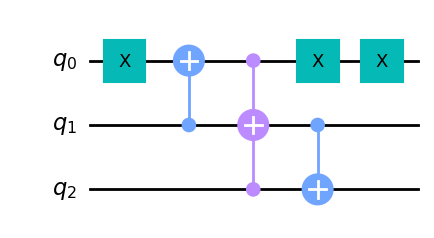

In [16]:
qc.draw('mpl')

In [18]:
dag = circuit_to_dag(qc)

depth = 0
depth_ls = []

for layer in dag.layers(): # layer 層目
    depth += 1
    subdag = layer['graph']
    print(f'--- gates of depth {depth} --- ')
    for index in range (len(subdag.op_nodes())):
        node = subdag.op_nodes()[index]
        print(node.name)
        if node.name == 'cx':
            depth_ls.append(depth)

print(f'--- Result --- ')
for i in depth_ls:
    print(f'depth of cx = {i}')

print(f'depth of last cx = {depth_cnot}')

--- gates of depth 1 --- 
x
--- gates of depth 2 --- 
cx
--- gates of depth 3 --- 
ccx
--- gates of depth 4 --- 
cx
x
--- gates of depth 5 --- 
x
--- Result --- 
depth of cx = 2
depth of cx = 4
depth of last cx = 4


In [ ]:
dag = circuit_to_dag(qc)

depth = 0
depth_ls = []

for layer in dag.layers(): # layer 層目
    depth += 1
    subdag = layer['graph']
    print(f'--- gates of depth {depth} --- ')
    for index in range (len(subdag.op_nodes())):
        node = subdag.op_nodes()[index]
        print(node.name)
        if node.name == 'cx':
            depth_ls.append(depth)

print(f'--- Result --- ')
for i in depth_ls:
    print(f'depth of cx = {i}')

print(f'depth of last cx = {depth_cnot}')

In [27]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.converters import circuit_to_dag, dag_to_circuit

qc = QuantumCircuit(3)
qc.cx(0,2)
qc.x(1)
qc.cx(2,0)
qc.x(1)

qc = QuantumCircuit(4)
for gate in qc:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

          
q_0: ──■──
       │  
q_1: ──┼──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘
               
q_0: ──■───────
       │  ┌───┐
q_1: ──┼──┤ X ├
     ┌─┴─┐└───┘
q_2: ┤ X ├─────
     └───┘     
               ┌───┐
q_0: ──■───────┤ X ├
       │  ┌───┐└─┬─┘
q_1: ──┼──┤ X ├──┼──
     ┌─┴─┐└───┘  │  
q_2: ┤ X ├───────■──
     └───┘          
               ┌───┐     
q_0: ──■───────┤ X ├─────
       │  ┌───┐└─┬─┘┌───┐
q_1: ──┼──┤ X ├──┼──┤ X ├
     ┌─┴─┐└───┘  │  └───┘
q_2: ┤ X ├───────■───────
     └───┘               


In [28]:
from qiskit import QuantumCircuit

# Test Circuit 1
circuit1 = QuantumCircuit(4)
circuit1.h(0)
circuit1.x(1)
circuit1.cx(0, 1)
circuit1.y(2)
circuit1.cx(1, 2)
circuit1.x(3)
circuit1.cx(2, 3)
circuit1.h(1)
circuit1.y(3)
circuit1.cx(3, 0)

qc = QuantumCircuit(4)
for gate in circuit1:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 2
circuit2 = QuantumCircuit(4)
circuit2.cx(2, 1)
circuit2.h(0)
circuit2.x(2)
circuit2.y(1)
circuit2.cx(0, 2)
circuit2.h(3)
circuit2.cx(1, 3)
circuit2.y(0)
circuit2.x(1)

qc = QuantumCircuit(4)
for gate in circuit2:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 3
circuit3 = QuantumCircuit(4)
circuit3.x(0)
circuit3.h(1)
circuit3.cx(0, 2)
circuit3.y(2)
circuit3.cx(1, 0)
circuit3.x(3)
circuit3.h(2)
circuit3.cx(2, 3)
circuit3.y(1)

qc = QuantumCircuit(4)
for gate in circuit3:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 4
circuit4 = QuantumCircuit(4)
circuit4.y(0)
circuit4.cx(0, 1)
circuit4.x(1)
circuit4.h(2)
circuit4.cx(1, 2)
circuit4.y(3)
circuit4.cx(2, 3)
circuit4.x(0)
circuit4.h(1)

qc = QuantumCircuit(4)
for gate in circuit4:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 5
circuit5 = QuantumCircuit(4)
circuit5.h(0)
circuit5.cx(0, 1)
circuit5.y(1)
circuit5.x(2)
circuit5.cx(1, 2)
circuit5.h(3)
circuit5.cx(2, 3)
circuit5.y(0)
circuit5.x(3)


qc = QuantumCircuit(4)
for gate in circuit5:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 6
circuit6 = QuantumCircuit(4)
circuit6.cx(2, 0)
circuit6.y(0)
circuit6.h(1)
circuit6.x(2)
circuit6.cx(0, 1)
circuit6.y(3)
circuit6.h(2)
circuit6.x(1)
circuit6.cx(2, 3)


qc = QuantumCircuit(4)
for gate in circuit6:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 7
circuit7 = QuantumCircuit(4)
circuit7.y(1)
circuit7.h(0)
circuit7.x(1)
circuit7.cx(0, 1)
circuit7.y(2)
circuit7.h(3)
circuit7.x(2)
circuit7.cx(1, 2)
circuit7.cx(2, 3)

qc = QuantumCircuit(4)
for gate in circuit7:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 8
circuit8 = QuantumCircuit(4)
circuit8.h(0)
circuit8.y(1)
circuit8.cx(0, 1)
circuit8.x(2)
circuit8.h(3)
circuit8.cx(1, 2)
circuit8.y(0)
circuit8.x(3)
circuit8.cx(2, 3)

qc = QuantumCircuit(4)
for gate in circuit8:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 9
circuit9 = QuantumCircuit(4)
circuit9.x(1)
circuit9.h(0)
circuit9.y(1)
circuit9.cx(0, 1)
circuit9.x(2)
circuit9.h(3)
circuit9.y(2)
circuit9.cx(1, 2)
circuit9.cx(2, 3)

qc = QuantumCircuit(4)
for gate in circuit9:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)

# Test Circuit 10
circuit10 = QuantumCircuit(4)
circuit10.cx(1, 0)
circuit10.x(1)
circuit10.h(0)
circuit10.y(1)
circuit10.cx(0, 1)
circuit10.x(2)
circuit10.h(3)
circuit10.y(2)
circuit10.cx(2, 3)

qc = QuantumCircuit(4)
for gate in circuit10:
    qc.append(gate[0], gate[1],gate[2])
    print(qc)


     ┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘
q_2: ──────────
               
q_3: ──────────
               
     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     ├───┤└───┘
q_2: ┤ Y ├─────
     └───┘     
q_3: ──────────
               
     ┌───┐          
q_0: ┤ H ├──■───────
     ├───┤┌─┴─┐     
q_1: ┤ X ├┤ X ├──■──
     ├───┤└───┘┌─┴─┐
q_2: ┤ Y ├─────┤ X ├
     └───┘     └───┘
q_3: ───────────────
                    
     ┌───┐          
q_0: ┤ H ├──■───────
     ├───┤┌─┴─┐     
q_1: ┤ X ├┤ X ├──■──
     ├───┤└───┘┌─┴─┐
q_2: ┤ Y ├─────┤ X ├
     ├───┤     └───┘
q_3: ┤ X ├──────────
     └───┘          
     ┌───┐               
q_0: ┤ H ├──■────────────
     ├───┤┌─┴─┐          
q_1: ┤ X ├┤ X ├──■───────
     ├───┤└───┘┌─┴─┐     
q_2: ┤

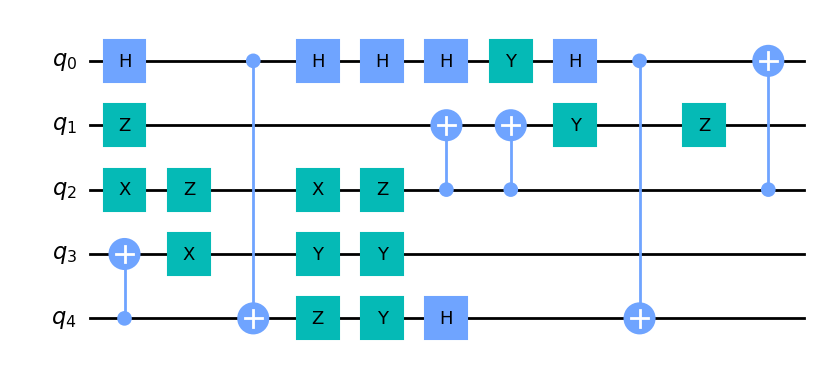